## E Commerce Review Analysis

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import time

### Working on dataset

In [2]:
#Importing data from CVS
data = pd.read_csv('Womens_Clothing_E_Commerce_Reviews.csv')

In [3]:
#Leaving of first column as we have index
data.drop('Unnamed: 0', axis=1,inplace=True)

In [4]:
#Removing rows with nan
data.dropna(subset=['Review Text','Division Name','Department Name','Class Name'],inplace=True)

In [5]:
data.columns = ['Clothing_Id', 'Age', 'Title', 'Review', 'Rating', 'Recommended_IND', 'Positive_Feedback_Count','Division_Name', 'Department_Name', 'Class_Name']

In [6]:
data.head(3)

,Clothing_Id,Age,Title,Review,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [7]:
# FInding number of unique things in each column
print('Clothing_Id :' + str(len(list(set(data['Clothing_Id'])))))
print('Age :' + str(len(list(set(data['Age'])))))
print('Rating :' + str(len(list(set(data['Rating'])))))
print('Recommended_IND :' + str(len(list(set(data['Recommended_IND'])))))
print('Positive_Feedback_Count :' + str(len(list(set(data['Positive_Feedback_Count'])))))
print('Division_Name :' + str(len(list(set(data['Division_Name'])))) + str(set(data['Division_Name'])))
print('Department_Name :' + str(len(list(set(data['Department_Name'])))) +  str(set(data['Department_Name'])))
print('Class_Name :' + str(len(list(set(data['Class_Name'])))))

Clothing_Id :1172
Age :77
Rating :5
Recommended_IND :2
Positive_Feedback_Count :82
Division_Name :3{'General', 'General Petite', 'Initmates'}
Department_Name :6{'Trend', 'Intimate', 'Bottoms', 'Tops', 'Jackets', 'Dresses'}
Class_Name :20


### Analysis 1: Department & Division  v.s.  Review Count

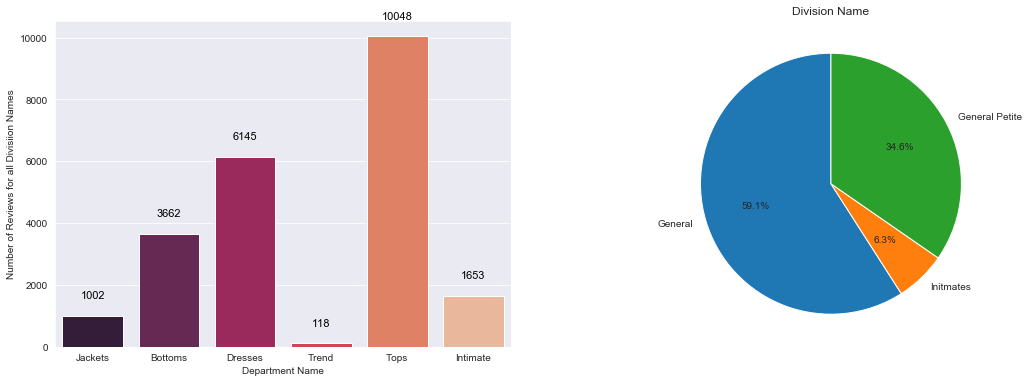

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
f, axes = plt.subplots (1,2, figsize=(18,6))

# Histrogram
x = ['Jackets', 'Bottoms', 'Dresses', 'Trend', 'Tops', 'Intimate']
y = [data.Department_Name[(data['Department_Name']=='Jackets')].count(),
     data.Department_Name[(data['Department_Name']=='Bottoms')].count(),
     data.Department_Name[(data['Department_Name']=='Dresses')].count(),
     data.Department_Name[(data['Department_Name']=='Trend')].count(),
     data.Department_Name[(data['Department_Name']=='Tops')].count(),
     data.Department_Name[(data['Department_Name']=='Intimate')].count(), ]

vis1= sns.barplot(x,y,palette='rocket', ax=axes[0])
vis1.set(xlabel='Department Name',ylabel='Number of Reviews for all Divisiion Names')

for p in vis1.patches:
             vis1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')


# Histrogram
NG = [data.Division_Name[(data['Division_Name']=='General')].count(), data.Division_Name[(data['Division_Name']=='Initmates')].count(), data.Division_Name[(data['Division_Name']=='General Petite')].count() ]
G = ['General', 'Initmates', 'General Petite']

plt.title('Division Name')
plt.pie(NG, labels=G, startangle=90, autopct='%.1f%%')
plt.ioff()

### Analysis 2: Department & Division  v.s.  Positive Feedback Count

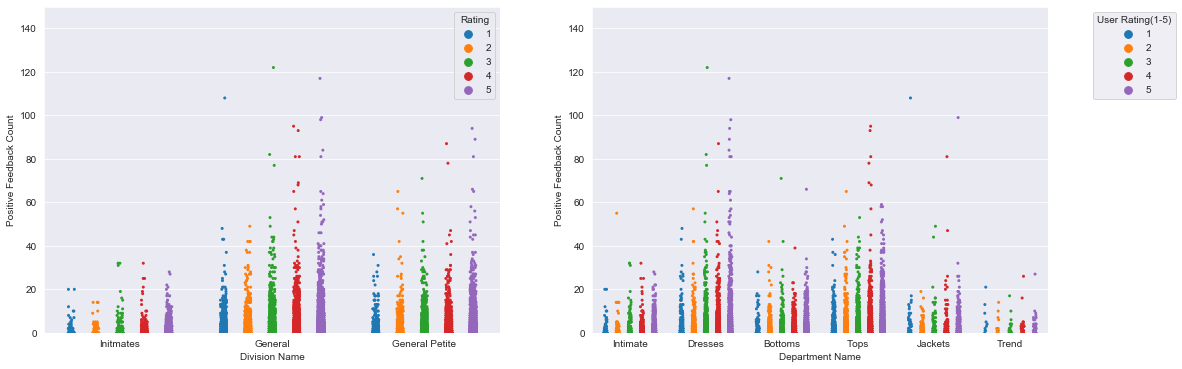

In [9]:
f, axes = plt.subplots (1,2, figsize=(18,6))

#stripplot Number of positive feedbacks given by people for different Division name giving different ratings
vis1= sns.stripplot(y='Positive_Feedback_Count' , x='Division_Name', data=data,\
                hue='Rating',dodge=True, size=3, ax=axes[0])
vis1.set(ylim=(0, 150))
vis1.set(xlabel='Division Name',ylabel='Positive Feedback Count')

#stripplot Number of positive feedbacks given by people for different Department Name giving different ratings
vis2= sns.stripplot(y='Positive_Feedback_Count' , x='Department_Name', data=data,\
                hue='Rating',dodge=True, size=3, ax=axes[1])
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.29, 1))
vis2.set(ylim=(0, 150))
vis2.set(xlabel='Department Name',ylabel='Positive Feedback Count')

plt.ioff()

In [10]:
data.head(4)

,Clothing_Id,Age,Title,Review,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants


### Analysis 3: Positive Feedback Count  v.s.  Age

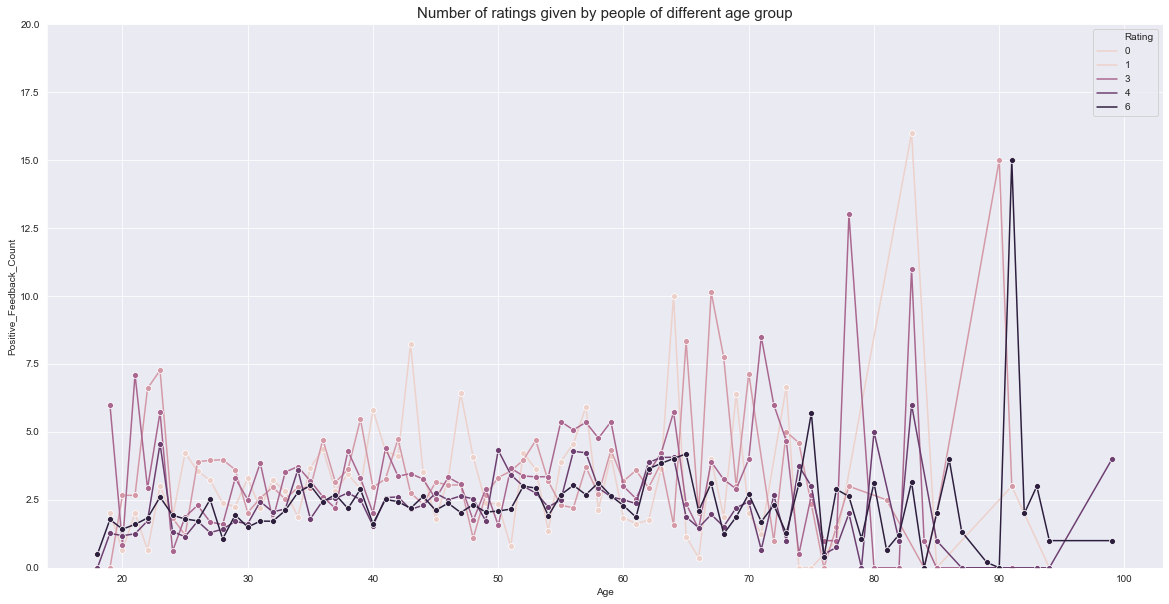

In [11]:
#Number of ratings given by people of different age group
plt.subplots(figsize=(20,10))
vis2 = sns.lineplot(x=data.Age, y=data.Positive_Feedback_Count , hue=data.Rating , err_style=None, marker='o')
vis2.set(ylim=(0, 20))
vis2.set_title('Number of ratings given by people of different age group', fontsize=15)

plt.legend(bbox_to_anchor=(1, 1))
plt.ioff()

### Analysis 4: Positive Feedback Count  v.s.  Recommendation

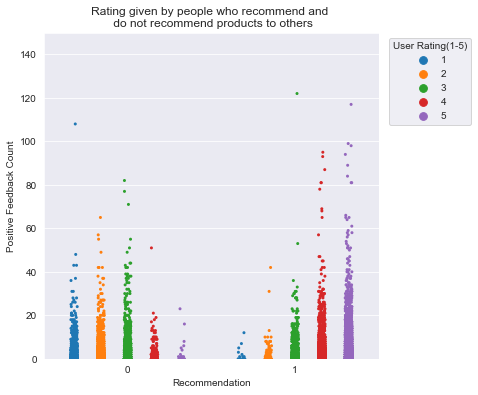

In [12]:
# Rating given by people who recommend and do not recommend products to others
plt.subplots (figsize=(6,6))
vis1= sns.stripplot(y='Positive_Feedback_Count' , x='Recommended_IND', data=data,\
                hue='Rating',dodge=True, size=3)
vis1.set(ylim=(0, 150))
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.29, 1))
vis1.set(xlabel='Recommendation',ylabel='Positive Feedback Count')
vis1.set_title('Rating given by people who recommend and \n do not recommend products to others')
plt.show()


From the above graph we come to know that the people who do not recommend the product to others tend to give low ratings
Compared to those who recommend the products to others

### Analysis 5: Recommendation Count  v.s. Age 

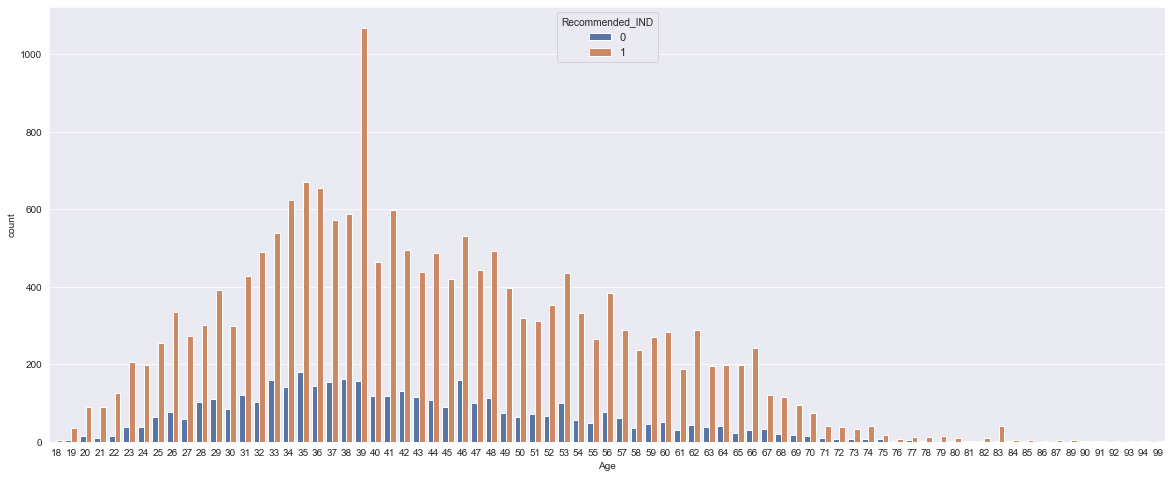

In [13]:
# Finding out which age group people give the most recomendation to others and also who don't recommend
plt.subplots(figsize=(20,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="Age",hue='Recommended_IND', data=data)


From the above graph we can come to a conclusion that the age group between 33 to 53 are most active and recommend the most

### Creating Rating Class

In [14]:
data_class = data

In [15]:
data_class['Class'] = 'Bad'
data_class.loc[data_class.Rating>3,['Class']]  = 'Good'
data_class.drop(['Title', 'Age','Rating'], axis=1, inplace=True)

In [16]:
data_class.head(3)

,Clothing_Id,Review,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Class
0,767,Absolutely wonderful - silky and sexy and comf...,1,0,Initmates,Intimate,Intimates,Good
1,1080,Love this dress! it's sooo pretty. i happene...,1,4,General,Dresses,Dresses,Good
2,1077,I had such high hopes for this dress and reall...,0,0,General,Dresses,Dresses,Bad


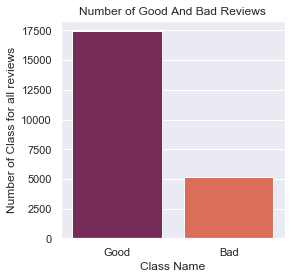

In [17]:
x = data_class['Class'].unique()
y = [data_class.Class[(data_class['Class'] == 'Good')].count(),
     data_class.Class[(data_class['Class'] == 'Bad')].count()]

plt.subplots(figsize=(4,4))
graph = sns.barplot(x,y,palette='rocket')
# vis1= sns.barplot(x,y,palette='rocket')
graph.set(xlabel='Class Name',ylabel='Number of Class for all reviews')
plt.title('Number of Good And Bad Reviews')
plt.ioff()

### Analysis 6: Top 10 most reviewed products

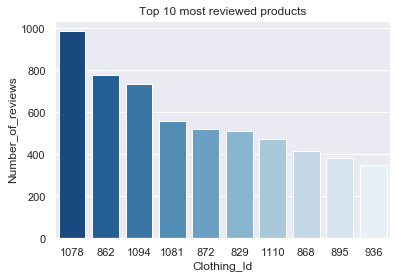

In [18]:
cloth_id = ((pd.DataFrame({'Number_of_reviews' : (data_class.groupby('Clothing_Id').count()['Class'])})).reset_index(level=0)).sort_values(by=['Number_of_reviews'], ascending=False)[:10]
# """ .plot(x='Clothing_Id', y ='Number_of_reviews',kind='bar',title='Top 10 most reviewed products') """
graph = sns.barplot(x='Clothing_Id', y ='Number_of_reviews',data=cloth_id,order=list(cloth_id['Clothing_Id']),palette='Blues_r')
graph.set_title('Top 10 most reviewed products')
plt.ioff()

### Analysis 7: Good & Bad Reviews in top 10 products

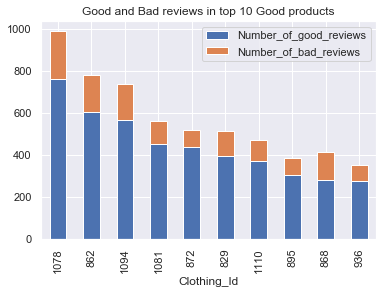

In [19]:
# Plot to show how many people like and dilike a product of top 10 liked products
good_df = (((pd.DataFrame({'Number_of_good_reviews' : ((data_class.loc[data_class.Class == 'Good']).groupby('Clothing_Id').count()['Class'])})).reset_index(level=0)).sort_values(by=['Number_of_good_reviews'], ascending=False))
bad_df = (((pd.DataFrame({'Number_of_bad_reviews' : ((data_class.loc[data_class.Class == 'Bad']).groupby('Clothing_Id').count()['Class'])})).reset_index(level=0)).sort_values(by=['Number_of_bad_reviews'], ascending=False))
review_cloth_id = pd.merge(good_df, bad_df,on=['Clothing_Id'],how='outer').sort_values(by=['Number_of_good_reviews'],ascending=False)[:10]
review_cloth_id.plot(x ='Clothing_Id', kind='bar', stacked=True,title='Good and Bad reviews in top 10 Good products')

plt.ioff()

## Applying Natural Language Processing

### Cleaning data for Model

In [20]:
model_data = data_class
model_data.drop(['Clothing_Id','Recommended_IND','Positive_Feedback_Count','Division_Name','Department_Name','Class_Name'], axis=1, inplace=True)

In [21]:
model_data['Processed_review'] = np.nan

In [22]:
model_data = model_data.reset_index()
model_data.drop(['index'], axis=1,inplace=True)

In [23]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, SnowballStemmer
import string

ps = PorterStemmer()
sno = SnowballStemmer('english') 
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [24]:
# CLeaning and add it to the DataFrame
def process(i):
    orginal_sent = model_data['Review'][i]
    tokenized_sent = word_tokenize(orginal_sent)
    stop_sent = [w for w in tokenized_sent if w not in stop_words and w not in string.punctuation]
    lemmatized_sent = [lemmatizer.lemmatize(w) for w in stop_sent]
    model_data['Processed_review'][i] = ' '.join(lemmatized_sent)

for i in range(len(model_data['Review'])):
    try:
        process(i)
    except:
        pass

### Creating Bag of Words Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
import sklearn

In [26]:
# Vectorizing and defining x and y
vectorize = TfidfVectorizer(use_idf = True, lowercase=True, strip_accents='ascii', stop_words=stop_words,max_features=4000)
y = model_data.Class
x = vectorize.fit_transform(model_data.Processed_review)

#### Naive Bayes (BernoulliNB)

In [27]:
def model_BernoulliNB():
    start_time = time.time()
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=421,test_size=0.2)
    # Training the model
    clf = naive_bayes.BernoulliNB()  
    clf.fit(x_train, y_train)
    # Testing
    y_pred = clf.predict(x_test)
    return accuracy_score(y_test,y_pred) * 100, time.time() - start_time

#### Naive Bayes (MultinomialNB)

In [28]:
def model_MultinomialNB():
    start_time = time.time()
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=421)
    # Training the model
    clf = naive_bayes.MultinomialNB()   
    clf.fit(x_train, y_train)
    # Testing
    y_pred = clf.predict(x_test)
    return (accuracy_score(y_test,y_pred) * 100), (time.time() - start_time)

#### Naive Bayes (ComplementNB)

In [29]:
def model_ComplementNB():
    start_time = time.time()
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=421)
    # Training the model
    clf = naive_bayes.ComplementNB() 
    clf.fit(x_train, y_train)
    # Testing
    y_pred = clf.predict(x_test)
    return (accuracy_score(y_test,y_pred) * 100), (time.time() - start_time)

#### Random Forest

In [30]:
def model_RandomForestClassifier():
    start_time = time.time()
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=421)
    # Training the model
    clf = RandomForestClassifier()   
    clf.fit(x_train, y_train)
    # Testing
    y_pred = clf.predict(x_test)
    return (accuracy_score(y_test,y_pred) * 100), (time.time() - start_time)

#### Decision Tree

In [31]:
def DecisionTreeClassifier():
    start_time = time.time()
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=421)
    # Training the model
    clf = tree.DecisionTreeClassifier()   
    clf.fit(x_train, y_train)
    # Testing
    y_pred = clf.predict(x_test)
    return (accuracy_score(y_test,y_pred) * 100), (time.time() - start_time)

#### SVM (linear kernel)

In [32]:
def model_svm_linear():
    start_time = time.time()
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=421)
    # Training the model
    clf = svm.SVC(kernel='linear')   
    clf.fit(x_train, y_train)
    # Testing
    y_pred = clf.predict(x_test)
    return (accuracy_score(y_test,y_pred) * 100), (time.time() - start_time)

#### SVM (poly kernel)

In [33]:
def model_svm_poly():
    start_time = time.time()
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=421)
    # Training the model
    clf = sklearn.svm.SVC(kernel='poly')   
    clf.fit(x_train, y_train)
    # Testing
    y_pred = clf.predict(x_test)
    return (accuracy_score(y_test,y_pred) * 100), (time.time() - start_time)

#### SVM (rbf kernel)

In [34]:
def model_svm_rbf():
    start_time = time.time()
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=421)
    # Training the model
    clf = sklearn.svm.SVC(kernel='rbf')   
    clf.fit(x_train, y_train)
    # Testing
    y_pred = clf.predict(x_test)
    return (accuracy_score(y_test,y_pred) * 100), (time.time() - start_time)

#### Logistic Regression

In [35]:
def model_LogisticRegression():
    start_time = time.time()
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x,y)
    # Training the model
    clf = sklearn.linear_model.LogisticRegression()   
    clf.fit(x_train, y_train)
    # Testing
    y_pred = clf.predict(x_test)
    return (accuracy_score(y_test,y_pred) * 100), (time.time() - start_time)

#### K Nearest Neighbors

In [36]:
def model_KNeighborsClassifier():
    start_time = time.time()
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x,y)
    # Training the model
    clf = sklearn.neighbors.KNeighborsClassifier()   
    clf.fit(x_train, y_train)
    # Testing
    y_pred = clf.predict(x_test)
    return (accuracy_score(y_test,y_pred) * 100), (time.time() - start_time)

### Summary of Observations

<font color = 'red' >Note : The cell below takes a lot of time to execute, as all the models are actually applied here </font>

In [37]:
models = [model_BernoulliNB(), model_MultinomialNB(), model_ComplementNB(), model_RandomForestClassifier(), DecisionTreeClassifier(), model_svm_linear(), model_svm_poly(), model_svm_rbf(), model_LogisticRegression(), model_KNeighborsClassifier()]

models_name = ['BernoulliNB', 'MultinomialNB', 'ComplementNB', 'RandomForestClassifier', 'DecisionTreeClassifier', 'svm_linear', 'svm_poly', 'svm_rbf', 'LogisticRegression', 'KNeighborsClassifier']

accuracy = []
timing = []
for m in models:
    acc, tim = m
    accuracy.append(acc)
    timing.append(tim)
result = pd.DataFrame({'Models' : models_name, 'Accuracy' : accuracy, 'Timing' : timing})
result

,Models,Accuracy,Timing
0,BernoulliNB,87.406098,0.069283
1,MultinomialNB,84.037476,0.078126
2,ComplementNB,86.300159,0.062512
3,RandomForestClassifier,85.098109,14.149004
4,DecisionTreeClassifier,77.744387,5.015664
5,svm_linear,88.456779,42.262739
6,svm_poly,79.724235,269.942519
7,svm_rbf,88.386070,106.848195
8,LogisticRegression,88.350716,0.312516
9,KNeighborsClassifier,80.661128,5.484379


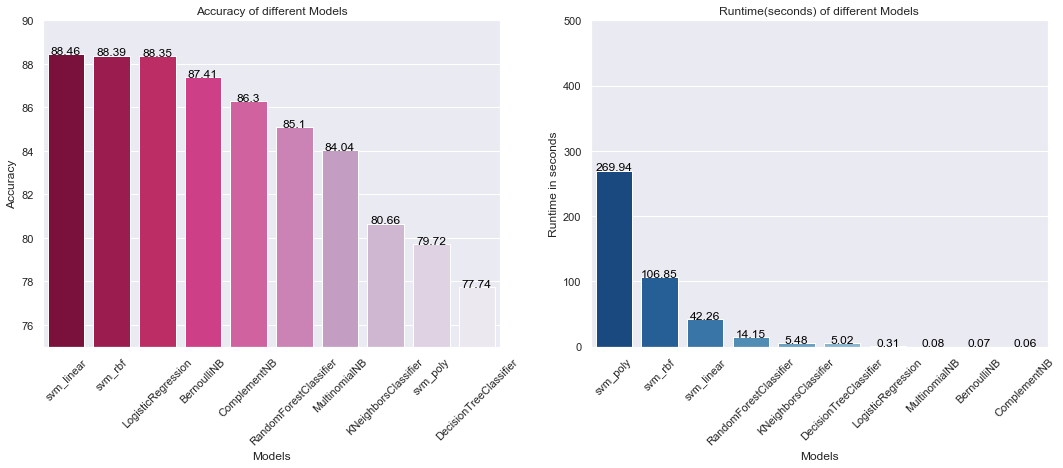

In [38]:
# plotting Accuracy and Timings of all models
f, axes = plt.subplots (1,2, figsize=(18,6))

# Accuracy
result.sort_values(by=['Accuracy'], ascending=False, inplace=True)
result = result.reset_index()
result.drop(['index'], axis=1,inplace=True)

vis1= sns.barplot(y='Accuracy' , x='Models', data=result,dodge=True, ax=axes[0],palette='PuRd_r',)
vis1.set(ylim=(75, 90))
vis1.set(xlabel='Models',ylabel='Accuracy')
vis1.set_xticklabels(vis1.get_xticklabels(), rotation=45)
vis1.set_title('Accuracy of different Models')

for index, row in result.iterrows():
    vis1.text(row.name,row.Accuracy, round(row.Accuracy,2), color='black', ha="center")


# Timing
result.sort_values(by=['Timing'], ascending=False, inplace=True)
result = result.reset_index()
result.drop(['index'], axis=1,inplace=True)

vis2= sns.barplot(y='Timing' , x='Models', data=result,dodge=True, ax=axes[1],palette='Blues_r',)
vis2.set(ylim=(0, 500))
vis2.set(xlabel='Models',ylabel='Runtime in seconds')
vis2.set_xticklabels(vis2.get_xticklabels(), rotation=45)
vis2.set_title('Runtime(seconds) of different Models')

for index, row in result.iterrows():
    vis2.text(row.name,row.Timing, round(row.Timing,2), color='black', ha="center")

plt.ioff()

### Inference after applying NLP

**On selecting the test_size= 0.20 & max_features= 4000, we get the following accuracy score in different classification models:**

* naive_bayes.BernoulliNB = 87.4 %
* naive_bayes.MultinomialNB = 84.0 %
* naive_bayes.ComplementNB = 86.3 %
* RandomForestClassifier = 85.0 %
* tree.DecisionTreeClassifier = 77.8 %
* support vector machine svm.SVC(kernel='linear') = 88.4 %
* support vector machine svm.SVC(kernel='poly') = 79.7 %
* support vector machine svm.SVC(kernel='rbf') = 88.4 %
* linear_model.LogisticRegression = 87.2 %
* sklearn.neighbors.KNeighborsClassifier = 81.0%

**It is seen that support vector machine svm.SVC(kernel='linear') model predicts the test set with most accuracy.**